<html>
<head>
	<title></title>
</head>
<body>
<h1 style="text-align: center;line-height: 120%;">ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ «МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ» Кафедра «РЗиАЭ»</h1>
<h2 style="text-align: center;line-height: 20%;">Лабораторная работа №3</h2>

<h3 style="text-align: center;line-height: 80%;"><em>РЕШАЮЩЕЕ ДЕРЕВО. КОМПОЗИЦИИ РЕШАЮЩИХ
ДЕРЕВЬЕВ. МНОГОСЛОЙНЫЙ ПЕРЦЕПТРОН </em></h3>
    
<h3 style="text-align: center;line-height: 60%;"><em>по дисциплине: "Применение искусственного интеллекта в электроэнергетике"   </em></h3>

    
<p style="text-align: right;line-height: 40%;"> Выполнил: студент группы Э-13м-19</p>

<p style="text-align: right;line-height: 40%;">Антонов И.И.</p>

<p style="text-align: right;line-height: 40%;">Принял: Нухулов С.М.</p>
<h4 style="text-align: center;line-height: 100%;"><em> Москва, 2020</em></h3>
</body>
</html>

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.datasets import mnist

## Пункт 1

In [2]:
data = pd.read_csv('income.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Пункт 2. Анализ данных

### Пункт 2.1

In [3]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Пропуски в данных отсутствуют

### Пункт 2.2

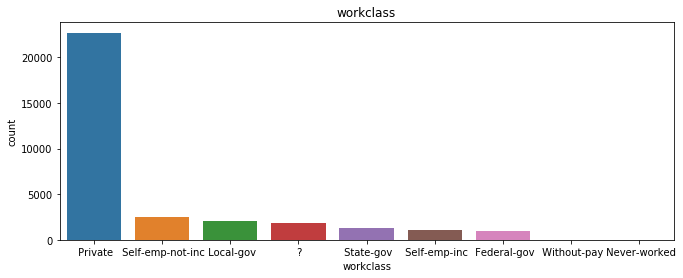

In [4]:
f=plt.figure(figsize=(11,4))
plt.title('workclass')
sns.countplot(x = data['workclass'], order = data['workclass'].value_counts().index);

### Пункт 2.3

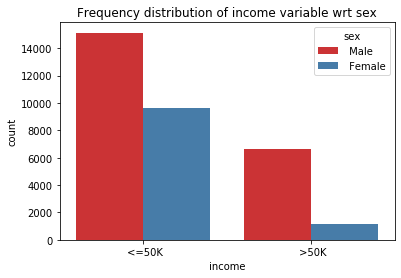

In [5]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="income", hue="sex", data=data, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

### Пункт 2.4

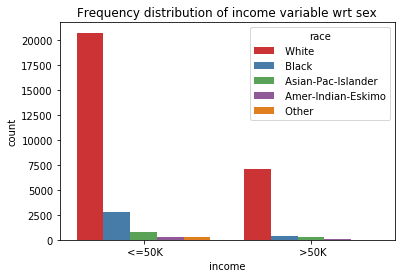

In [6]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="income", hue="race", data=data, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

### Пункт 2.5

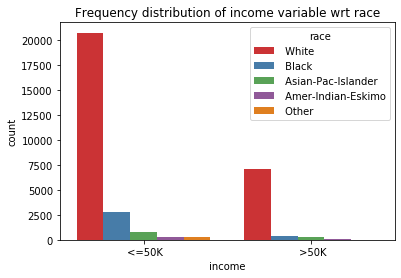

In [7]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="income", hue="race", data=data, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

### Пункт 2.6

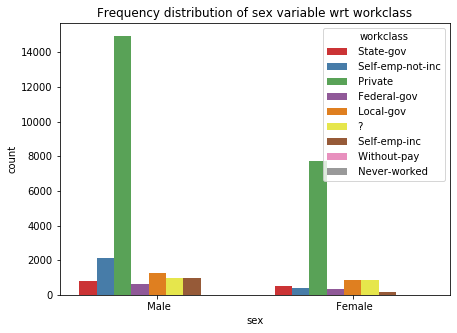

In [8]:
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(x="sex", hue="workclass", data=data, palette="Set1")
ax.set_title("Frequency distribution of sex variable wrt workclass")
plt.show()

### Пункт 2.7

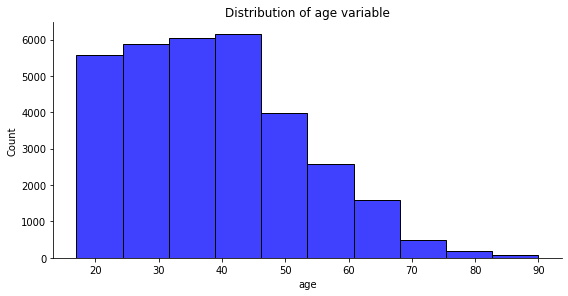

In [9]:
sns.displot(x=data['age'], bins=10,color='blue', height=4, aspect=2);
plt.title('Distribution of age variable');

### Пункт 2.8

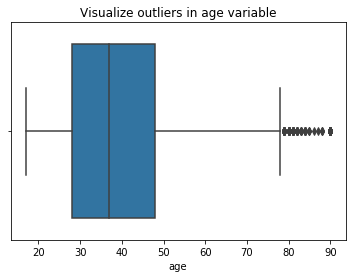

In [10]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.boxplot(x = data['age'])
ax.set_title("Visualize outliers in age variable")
plt.show()

### Пункт 2.9

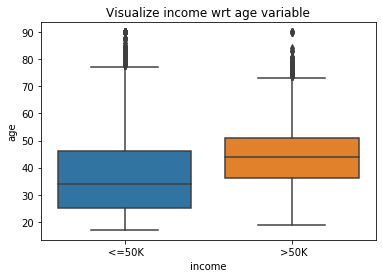

In [11]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.boxplot(x="income", y="age", data=data)
ax.set_title("Visualize income wrt age variable")
plt.show()

### Пункт 2.10

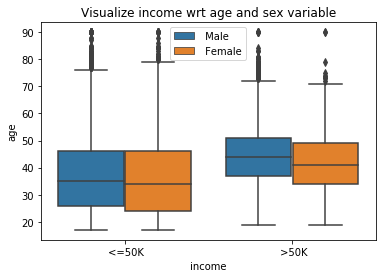

In [12]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.boxplot(x="income", y="age", hue="sex", data=data)
ax.set_title("Visualize income wrt age and sex variable")
ax.legend(loc='upper center')
plt.show()

### Пункт 2.11

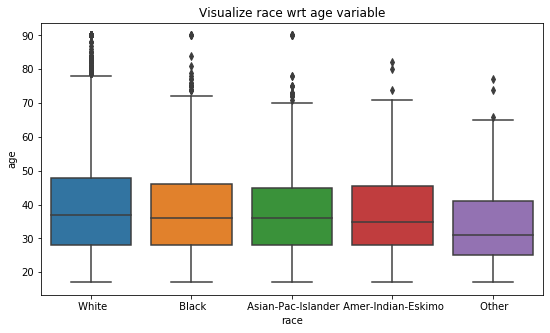

In [13]:
f, ax = plt.subplots(figsize=(9,5))
ax = sns.boxplot(x='race', y='age', data=data)
ax.set_title('Visualize race wrt age variable')
plt.show()

### Пункт 2.12

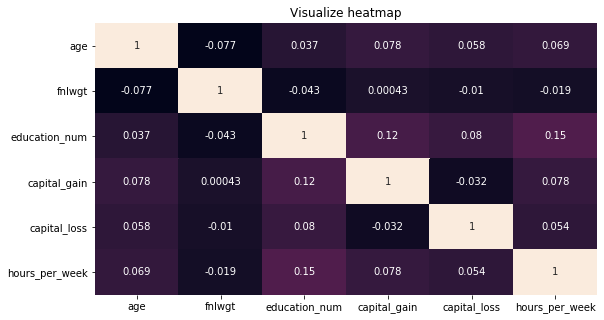

In [14]:
f, ax = plt.subplots(figsize=(9,5))
ax = sns.heatmap(data.corr(),annot=True, cbar=False);
ax.set_title('Visualize heatmap')
plt.show()

### Пункт 2.13

In [15]:
data.replace('?',np.NaN, inplace=True)

### Пункт 2.14

In [16]:
categorical = [var for var in data.columns if data[var].dtype=='object']
data[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


### Пункт 2.15

In [17]:
data.select_dtypes(include=np.number).head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


## Пункт 3

In [18]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

for i in categorical:
    data[i] = label_encoder.fit_transform(data[i])
    
X = data.drop(columns='income', axis=1)
Y = data['income']

X_scaling = scaler.fit_transform(X)

X_train, X_holdout, y_train, y_holdout = train_test_split(X_scaling, Y, test_size = 0.33, random_state = 17)
X_train.shape, X_holdout.shape, y_train.shape, y_holdout.shape

((21815, 14), (10746, 14), (21815,), (10746,))

## Пункт 4

In [19]:
max_depth = np.arange(1,40,1)

In [20]:
F_train = []
F_valid = []
Run_time = []
for i in max_depth:
    start = time.time()
    model = DecisionTreeClassifier(max_depth = i, random_state = 17)
    model.fit(X_train, y_train)
    end = time.time()
    run_time = end-start
    Run_time.append(run_time)
    y_pred_train = model.predict(X_train)
    y_pred_valid = model.predict(X_holdout)
    F_train.append(f1_score(y_train, y_pred_train))
    F_valid.append(f1_score(y_holdout, y_pred_valid))

best max_depth: 10


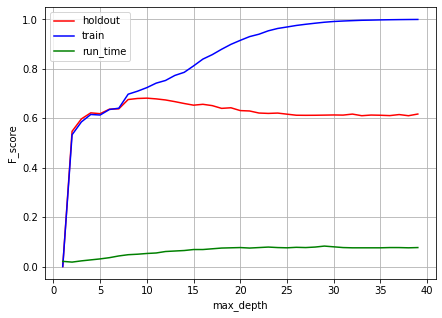

In [21]:
f=plt.figure(figsize=(7,5))
plt.plot(max_depth, F_valid, "r", label = 'holdout')
plt.plot(max_depth, F_train, "b", label = 'train')
plt.plot(max_depth, Run_time, "g", label = 'run_time')
plt.ylabel('F_score')
plt.xlabel('max_depth')
plt.legend()
plt.grid();
print(f'best max_depth: {max_depth[F_valid.index(max(F_valid))]}')

In [22]:
#Обучим модель для последующих пунктов
model = DecisionTreeClassifier(max_depth = 10, random_state = 17)
model.fit(X_train, y_train);

In [23]:
confusion_m = confusion_matrix(y_holdout.to_numpy(), model.predict(X_holdout)) 
pd.DataFrame(data  =  confusion_m,  columns  =  ['predicted_0', 'predicted_1'], index = ['actual_0', 'actual_1'])

,predicted_0,predicted_1
actual_0,7433,677
actual_1,924,1712


In [24]:
y_pred_valid = model.predict(X_holdout)
recall_score(y_holdout, y_pred_valid), precision_score(y_holdout, y_pred_valid), f1_score(y_holdout, y_pred_valid)

(0.6494688922610015, 0.7166178317287568, 0.6813930348258707)

## Пункт 5

In [25]:
n_estimators_range = np.arange(1, 50, 5)

In [26]:
F_train = []
F_valid = []
for i in n_estimators_range:
    model2 = RandomForestClassifier(n_estimators = i)
    model2.fit(X_train, y_train)
    y_pred_train = model2.predict(X_train)
    y_pred_valid = model2.predict(X_holdout)
    F_train.append(f1_score(y_train, y_pred_train))
    F_valid.append(f1_score(y_holdout, y_pred_valid))

best n_estimators: 41


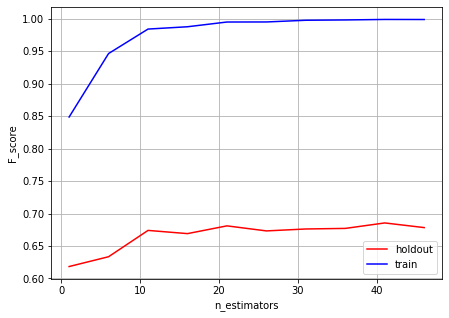

In [27]:
f=plt.figure(figsize=(7,5))
plt.plot(n_estimators_range, F_valid, "r", label = 'holdout')
plt.plot(n_estimators_range, F_train, "b", label = 'train')
plt.ylabel('F_score')
plt.xlabel('n_estimators')
plt.legend()
plt.grid();
print(f'best n_estimators: {n_estimators_range[F_valid.index(max(F_valid))]}')

In [28]:
#Обучим модель для последующих пунктов
model2 = RandomForestClassifier(n_estimators = 41, max_depth = 17, max_features = 'sqrt')
model2.fit(X_train, y_train);

In [29]:
cfm = confusion_matrix(y_holdout.to_numpy(), model2.predict(X_holdout)) 
pd.DataFrame(data  =  cfm,  columns  =  ['predicted_0', 'predicted_1'], index = ['actual_0', 'actual_1'])

,predicted_0,predicted_1
actual_0,7653,457
actual_1,968,1668


In [30]:
y_pred_valid = model2.predict(X_holdout)
recall_score(y_holdout, y_pred_valid), precision_score(y_holdout, y_pred_valid), f1_score(y_holdout, y_pred_valid)

(0.6327769347496206, 0.7849411764705883, 0.700693131695022)

## Пункт 6

In [31]:
n_estimators_range = np.arange(1, 200, 5)
cat = CatBoostClassifier()
cat.fit(X_train, y_train);
F_train = []
F_valid = []
for i in n_estimators_range:
    cat = CatBoostClassifier(n_estimators = i)
    cat.fit(X_train, y_train)
    y_pred_train = cat.predict(X_train)
    y_pred_valid = cat.predict(X_holdout)
    F_train.append(f1_score(y_train, y_pred_train))
    F_valid.append(f1_score(y_holdout, y_pred_valid))

Learning rate set to 0.038422
0:	learn: 0.6543034	total: 193ms	remaining: 3m 13s
1:	learn: 0.6213999	total: 201ms	remaining: 1m 40s
2:	learn: 0.5913830	total: 209ms	remaining: 1m 9s
3:	learn: 0.5635488	total: 219ms	remaining: 54.5s
4:	learn: 0.5386778	total: 228ms	remaining: 45.4s
5:	learn: 0.5163040	total: 237ms	remaining: 39.3s
6:	learn: 0.4987218	total: 245ms	remaining: 34.7s
7:	learn: 0.4820973	total: 253ms	remaining: 31.3s
8:	learn: 0.4680704	total: 261ms	remaining: 28.7s
9:	learn: 0.4551818	total: 269ms	remaining: 26.6s
10:	learn: 0.4443935	total: 277ms	remaining: 24.9s
11:	learn: 0.4323810	total: 285ms	remaining: 23.4s
12:	learn: 0.4232163	total: 293ms	remaining: 22.2s
13:	learn: 0.4123738	total: 300ms	remaining: 21.2s
14:	learn: 0.4030493	total: 308ms	remaining: 20.2s
15:	learn: 0.3960746	total: 315ms	remaining: 19.4s
16:	learn: 0.3905731	total: 323ms	remaining: 18.7s
17:	learn: 0.3845079	total: 331ms	remaining: 18s
18:	learn: 0.3797946	total: 338ms	remaining: 17.5s
19:	learn: 

162:	learn: 0.2858951	total: 1.45s	remaining: 7.47s
163:	learn: 0.2857763	total: 1.47s	remaining: 7.48s
164:	learn: 0.2856792	total: 1.48s	remaining: 7.46s
165:	learn: 0.2853994	total: 1.49s	remaining: 7.46s
166:	learn: 0.2852664	total: 1.49s	remaining: 7.45s
167:	learn: 0.2851432	total: 1.5s	remaining: 7.43s
168:	learn: 0.2850324	total: 1.51s	remaining: 7.41s
169:	learn: 0.2849089	total: 1.51s	remaining: 7.4s
170:	learn: 0.2847699	total: 1.52s	remaining: 7.38s
171:	learn: 0.2846303	total: 1.53s	remaining: 7.36s
172:	learn: 0.2845191	total: 1.54s	remaining: 7.35s
173:	learn: 0.2843972	total: 1.54s	remaining: 7.33s
174:	learn: 0.2842731	total: 1.55s	remaining: 7.31s
175:	learn: 0.2841342	total: 1.56s	remaining: 7.3s
176:	learn: 0.2835763	total: 1.57s	remaining: 7.28s
177:	learn: 0.2834851	total: 1.57s	remaining: 7.27s
178:	learn: 0.2833832	total: 1.58s	remaining: 7.25s
179:	learn: 0.2832491	total: 1.59s	remaining: 7.23s
180:	learn: 0.2828739	total: 1.59s	remaining: 7.22s
181:	learn: 0.2

331:	learn: 0.2662009	total: 2.71s	remaining: 5.45s
332:	learn: 0.2661046	total: 2.72s	remaining: 5.44s
333:	learn: 0.2659175	total: 2.72s	remaining: 5.43s
334:	learn: 0.2658600	total: 2.73s	remaining: 5.42s
335:	learn: 0.2657703	total: 2.74s	remaining: 5.42s
336:	learn: 0.2655728	total: 2.75s	remaining: 5.41s
337:	learn: 0.2655068	total: 2.75s	remaining: 5.39s
338:	learn: 0.2653080	total: 2.76s	remaining: 5.38s
339:	learn: 0.2652275	total: 2.77s	remaining: 5.38s
340:	learn: 0.2651339	total: 2.78s	remaining: 5.37s
341:	learn: 0.2650526	total: 2.78s	remaining: 5.36s
342:	learn: 0.2649720	total: 2.79s	remaining: 5.35s
343:	learn: 0.2647953	total: 2.8s	remaining: 5.34s
344:	learn: 0.2647478	total: 2.81s	remaining: 5.33s
345:	learn: 0.2644705	total: 2.81s	remaining: 5.32s
346:	learn: 0.2644233	total: 2.82s	remaining: 5.3s
347:	learn: 0.2643704	total: 2.83s	remaining: 5.29s
348:	learn: 0.2643043	total: 2.83s	remaining: 5.28s
349:	learn: 0.2642117	total: 2.84s	remaining: 5.27s
350:	learn: 0.

492:	learn: 0.2533787	total: 3.97s	remaining: 4.08s
493:	learn: 0.2532556	total: 3.97s	remaining: 4.07s
494:	learn: 0.2531940	total: 3.98s	remaining: 4.06s
495:	learn: 0.2531147	total: 3.99s	remaining: 4.05s
496:	learn: 0.2530415	total: 4s	remaining: 4.05s
497:	learn: 0.2529922	total: 4s	remaining: 4.04s
498:	learn: 0.2529145	total: 4.01s	remaining: 4.03s
499:	learn: 0.2528674	total: 4.02s	remaining: 4.02s
500:	learn: 0.2528093	total: 4.03s	remaining: 4.01s
501:	learn: 0.2527356	total: 4.04s	remaining: 4s
502:	learn: 0.2526522	total: 4.04s	remaining: 3.99s
503:	learn: 0.2525777	total: 4.05s	remaining: 3.98s
504:	learn: 0.2525130	total: 4.06s	remaining: 3.98s
505:	learn: 0.2524326	total: 4.06s	remaining: 3.97s
506:	learn: 0.2523720	total: 4.07s	remaining: 3.96s
507:	learn: 0.2522752	total: 4.08s	remaining: 3.95s
508:	learn: 0.2521954	total: 4.08s	remaining: 3.94s
509:	learn: 0.2521464	total: 4.09s	remaining: 3.93s
510:	learn: 0.2520663	total: 4.1s	remaining: 3.92s
511:	learn: 0.2520305	

664:	learn: 0.2430143	total: 5.22s	remaining: 2.63s
665:	learn: 0.2429916	total: 5.23s	remaining: 2.62s
666:	learn: 0.2429214	total: 5.24s	remaining: 2.62s
667:	learn: 0.2428469	total: 5.25s	remaining: 2.61s
668:	learn: 0.2427556	total: 5.25s	remaining: 2.6s
669:	learn: 0.2427031	total: 5.26s	remaining: 2.59s
670:	learn: 0.2426436	total: 5.27s	remaining: 2.58s
671:	learn: 0.2425915	total: 5.28s	remaining: 2.58s
672:	learn: 0.2425086	total: 5.28s	remaining: 2.57s
673:	learn: 0.2424475	total: 5.29s	remaining: 2.56s
674:	learn: 0.2424124	total: 5.3s	remaining: 2.55s
675:	learn: 0.2423542	total: 5.3s	remaining: 2.54s
676:	learn: 0.2423084	total: 5.31s	remaining: 2.53s
677:	learn: 0.2422418	total: 5.32s	remaining: 2.52s
678:	learn: 0.2421938	total: 5.32s	remaining: 2.52s
679:	learn: 0.2421553	total: 5.33s	remaining: 2.51s
680:	learn: 0.2420827	total: 5.34s	remaining: 2.5s
681:	learn: 0.2420186	total: 5.34s	remaining: 2.49s
682:	learn: 0.2419025	total: 5.35s	remaining: 2.48s
683:	learn: 0.24

842:	learn: 0.2343574	total: 6.48s	remaining: 1.21s
843:	learn: 0.2343169	total: 6.49s	remaining: 1.2s
844:	learn: 0.2342801	total: 6.5s	remaining: 1.19s
845:	learn: 0.2342361	total: 6.51s	remaining: 1.18s
846:	learn: 0.2341788	total: 6.51s	remaining: 1.18s
847:	learn: 0.2341409	total: 6.52s	remaining: 1.17s
848:	learn: 0.2340896	total: 6.53s	remaining: 1.16s
849:	learn: 0.2340542	total: 6.54s	remaining: 1.15s
850:	learn: 0.2340067	total: 6.54s	remaining: 1.15s
851:	learn: 0.2339846	total: 6.55s	remaining: 1.14s
852:	learn: 0.2339501	total: 6.56s	remaining: 1.13s
853:	learn: 0.2339318	total: 6.56s	remaining: 1.12s
854:	learn: 0.2338759	total: 6.57s	remaining: 1.11s
855:	learn: 0.2338098	total: 6.58s	remaining: 1.11s
856:	learn: 0.2337533	total: 6.58s	remaining: 1.1s
857:	learn: 0.2336824	total: 6.59s	remaining: 1.09s
858:	learn: 0.2336561	total: 6.6s	remaining: 1.08s
859:	learn: 0.2336093	total: 6.61s	remaining: 1.07s
860:	learn: 0.2335477	total: 6.61s	remaining: 1.07s
861:	learn: 0.23

Learning rate set to 0.5
0:	learn: 0.4844341	total: 6.58ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4844341	total: 3.98ms	remaining: 19.9ms
1:	learn: 0.4055720	total: 7.84ms	remaining: 15.7ms
2:	learn: 0.3688210	total: 11.4ms	remaining: 11.4ms
3:	learn: 0.3480895	total: 15ms	remaining: 7.49ms
4:	learn: 0.3338289	total: 19.1ms	remaining: 3.83ms
5:	learn: 0.3216571	total: 23.4ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4844341	total: 3.92ms	remaining: 39.2ms
1:	learn: 0.4055720	total: 7.65ms	remaining: 34.4ms
2:	learn: 0.3688210	total: 11.1ms	remaining: 29.7ms
3:	learn: 0.3480895	total: 14.9ms	remaining: 26.1ms
4:	learn: 0.3338289	total: 18.8ms	remaining: 22.5ms
5:	learn: 0.3216571	total: 22.8ms	remaining: 19ms
6:	learn: 0.3156572	total: 26.8ms	remaining: 15.3ms
7:	learn: 0.3103045	total: 32.7ms	remaining: 12.3ms
8:	learn: 0.3066903	total: 37.1ms	remaining: 8.25ms
9:	learn: 0.3043433	total: 41.7ms	remaining: 4.17ms
10:	learn: 0.3020520	total: 45.3ms	remaining: 0us
L

36:	learn: 0.2733205	total: 164ms	remaining: 17.7ms
37:	learn: 0.2728747	total: 169ms	remaining: 13.3ms
38:	learn: 0.2722707	total: 172ms	remaining: 8.85ms
39:	learn: 0.2718966	total: 176ms	remaining: 4.41ms
40:	learn: 0.2710425	total: 180ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4844341	total: 3.74ms	remaining: 169ms
1:	learn: 0.4055720	total: 7.96ms	remaining: 175ms
2:	learn: 0.3688210	total: 12ms	remaining: 171ms
3:	learn: 0.3480895	total: 15.9ms	remaining: 167ms
4:	learn: 0.3338289	total: 20.2ms	remaining: 166ms
5:	learn: 0.3216571	total: 25.6ms	remaining: 170ms
6:	learn: 0.3156572	total: 29.3ms	remaining: 163ms
7:	learn: 0.3103045	total: 33.7ms	remaining: 160ms
8:	learn: 0.3066903	total: 37.9ms	remaining: 156ms
9:	learn: 0.3043433	total: 41.5ms	remaining: 149ms
10:	learn: 0.3020520	total: 45.3ms	remaining: 144ms
11:	learn: 0.3007639	total: 49.6ms	remaining: 141ms
12:	learn: 0.2991747	total: 53.9ms	remaining: 137ms
13:	learn: 0.2968154	total: 58.7ms	remaining: 134ms
14

Learning rate set to 0.499384
0:	learn: 0.4846154	total: 6.67ms	remaining: 400ms
1:	learn: 0.4057278	total: 11.8ms	remaining: 347ms
2:	learn: 0.3689433	total: 17ms	remaining: 329ms
3:	learn: 0.3481803	total: 22ms	remaining: 313ms
4:	learn: 0.3338989	total: 27.2ms	remaining: 305ms
5:	learn: 0.3217155	total: 34.3ms	remaining: 315ms
6:	learn: 0.3157095	total: 39.5ms	remaining: 305ms
7:	learn: 0.3103467	total: 44.7ms	remaining: 296ms
8:	learn: 0.3067273	total: 49.9ms	remaining: 288ms
9:	learn: 0.3043774	total: 55ms	remaining: 280ms
10:	learn: 0.3020832	total: 60ms	remaining: 273ms
11:	learn: 0.3007928	total: 65.8ms	remaining: 269ms
12:	learn: 0.2992011	total: 71.2ms	remaining: 263ms
13:	learn: 0.2968398	total: 76.8ms	remaining: 258ms
14:	learn: 0.2958963	total: 82.2ms	remaining: 252ms
15:	learn: 0.2945450	total: 87.3ms	remaining: 246ms
16:	learn: 0.2929793	total: 92.6ms	remaining: 240ms
17:	learn: 0.2919231	total: 97.8ms	remaining: 234ms
18:	learn: 0.2904629	total: 103ms	remaining: 227ms
1

65:	learn: 0.2629123	total: 347ms	remaining: 26.3ms
66:	learn: 0.2624853	total: 353ms	remaining: 21.1ms
67:	learn: 0.2619589	total: 359ms	remaining: 15.8ms
68:	learn: 0.2614044	total: 365ms	remaining: 10.6ms
69:	learn: 0.2608497	total: 371ms	remaining: 5.29ms
70:	learn: 0.2603531	total: 377ms	remaining: 0us
Learning rate set to 0.408203
0:	learn: 0.5133692	total: 7.07ms	remaining: 530ms
1:	learn: 0.4336591	total: 13.1ms	remaining: 483ms
2:	learn: 0.3895460	total: 18.5ms	remaining: 451ms
3:	learn: 0.3626231	total: 23.8ms	remaining: 429ms
4:	learn: 0.3453283	total: 28.9ms	remaining: 411ms
5:	learn: 0.3321225	total: 35.1ms	remaining: 410ms
6:	learn: 0.3258713	total: 40.6ms	remaining: 400ms
7:	learn: 0.3180947	total: 45.9ms	remaining: 391ms
8:	learn: 0.3136994	total: 51.4ms	remaining: 383ms
9:	learn: 0.3100969	total: 56.9ms	remaining: 376ms
10:	learn: 0.3070933	total: 62.6ms	remaining: 370ms
11:	learn: 0.3040277	total: 68.7ms	remaining: 366ms
12:	learn: 0.3023177	total: 74.4ms	remaining: 3

Learning rate set to 0.364458
0:	learn: 0.5285580	total: 5.18ms	remaining: 440ms
1:	learn: 0.4490923	total: 10.8ms	remaining: 453ms
2:	learn: 0.4028160	total: 15.6ms	remaining: 432ms
3:	learn: 0.3729643	total: 20.7ms	remaining: 423ms
4:	learn: 0.3548604	total: 26.1ms	remaining: 422ms
5:	learn: 0.3422954	total: 31.5ms	remaining: 420ms
6:	learn: 0.3321249	total: 36.6ms	remaining: 413ms
7:	learn: 0.3255343	total: 42.1ms	remaining: 410ms
8:	learn: 0.3209531	total: 46.9ms	remaining: 402ms
9:	learn: 0.3164695	total: 52.1ms	remaining: 396ms
10:	learn: 0.3111263	total: 57.8ms	remaining: 394ms
11:	learn: 0.3083266	total: 66.3ms	remaining: 409ms
12:	learn: 0.3057815	total: 72.3ms	remaining: 406ms
13:	learn: 0.3031350	total: 77.9ms	remaining: 400ms
14:	learn: 0.3014793	total: 83.3ms	remaining: 394ms
15:	learn: 0.2996539	total: 88.9ms	remaining: 389ms
16:	learn: 0.2982257	total: 94.2ms	remaining: 382ms
17:	learn: 0.2970703	total: 99.3ms	remaining: 375ms
18:	learn: 0.2959899	total: 105ms	remaining:

75:	learn: 0.2653940	total: 521ms	remaining: 103ms
76:	learn: 0.2653789	total: 527ms	remaining: 95.8ms
77:	learn: 0.2647366	total: 542ms	remaining: 90.4ms
78:	learn: 0.2647229	total: 550ms	remaining: 83.5ms
79:	learn: 0.2646347	total: 556ms	remaining: 76.4ms
80:	learn: 0.2640347	total: 563ms	remaining: 69.5ms
81:	learn: 0.2637833	total: 569ms	remaining: 62.5ms
82:	learn: 0.2631839	total: 579ms	remaining: 55.8ms
83:	learn: 0.2629162	total: 585ms	remaining: 48.7ms
84:	learn: 0.2626735	total: 591ms	remaining: 41.7ms
85:	learn: 0.2625228	total: 597ms	remaining: 34.7ms
86:	learn: 0.2623112	total: 603ms	remaining: 27.7ms
87:	learn: 0.2619803	total: 611ms	remaining: 20.8ms
88:	learn: 0.2618927	total: 617ms	remaining: 13.9ms
89:	learn: 0.2616195	total: 623ms	remaining: 6.92ms
90:	learn: 0.2615225	total: 629ms	remaining: 0us
Learning rate set to 0.329488
0:	learn: 0.5413721	total: 6.49ms	remaining: 617ms
1:	learn: 0.4629500	total: 13ms	remaining: 611ms
2:	learn: 0.4156452	total: 18.7ms	remainin

58:	learn: 0.2717184	total: 360ms	remaining: 257ms
59:	learn: 0.2713558	total: 366ms	remaining: 250ms
60:	learn: 0.2709839	total: 372ms	remaining: 244ms
61:	learn: 0.2708384	total: 378ms	remaining: 238ms
62:	learn: 0.2703503	total: 384ms	remaining: 232ms
63:	learn: 0.2702888	total: 391ms	remaining: 226ms
64:	learn: 0.2699565	total: 398ms	remaining: 221ms
65:	learn: 0.2691001	total: 404ms	remaining: 214ms
66:	learn: 0.2688028	total: 409ms	remaining: 207ms
67:	learn: 0.2686193	total: 415ms	remaining: 201ms
68:	learn: 0.2682194	total: 420ms	remaining: 195ms
69:	learn: 0.2681630	total: 425ms	remaining: 188ms
70:	learn: 0.2676433	total: 431ms	remaining: 182ms
71:	learn: 0.2671705	total: 437ms	remaining: 176ms
72:	learn: 0.2668766	total: 443ms	remaining: 170ms
73:	learn: 0.2664359	total: 449ms	remaining: 164ms
74:	learn: 0.2662531	total: 455ms	remaining: 158ms
75:	learn: 0.2660295	total: 461ms	remaining: 152ms
76:	learn: 0.2657105	total: 467ms	remaining: 145ms
77:	learn: 0.2652959	total: 472

30:	learn: 0.2910734	total: 179ms	remaining: 463ms
31:	learn: 0.2902870	total: 187ms	remaining: 461ms
32:	learn: 0.2889181	total: 192ms	remaining: 455ms
33:	learn: 0.2882659	total: 200ms	remaining: 452ms
34:	learn: 0.2877311	total: 205ms	remaining: 445ms
35:	learn: 0.2870247	total: 210ms	remaining: 438ms
36:	learn: 0.2864116	total: 218ms	remaining: 435ms
37:	learn: 0.2854595	total: 223ms	remaining: 429ms
38:	learn: 0.2849565	total: 229ms	remaining: 423ms
39:	learn: 0.2840514	total: 235ms	remaining: 418ms
40:	learn: 0.2825175	total: 242ms	remaining: 413ms
41:	learn: 0.2819836	total: 251ms	remaining: 412ms
42:	learn: 0.2816220	total: 256ms	remaining: 405ms
43:	learn: 0.2811562	total: 264ms	remaining: 401ms
44:	learn: 0.2807613	total: 269ms	remaining: 395ms
45:	learn: 0.2801326	total: 274ms	remaining: 388ms
46:	learn: 0.2797047	total: 280ms	remaining: 381ms
47:	learn: 0.2794555	total: 285ms	remaining: 374ms
48:	learn: 0.2789406	total: 291ms	remaining: 368ms
49:	learn: 0.2787448	total: 296

104:	learn: 0.2629583	total: 714ms	remaining: 74.8ms
105:	learn: 0.2627693	total: 720ms	remaining: 67.9ms
106:	learn: 0.2626151	total: 727ms	remaining: 61.1ms
107:	learn: 0.2625161	total: 733ms	remaining: 54.3ms
108:	learn: 0.2623748	total: 740ms	remaining: 47.5ms
109:	learn: 0.2619270	total: 746ms	remaining: 40.7ms
110:	learn: 0.2618720	total: 753ms	remaining: 33.9ms
111:	learn: 0.2617277	total: 759ms	remaining: 27.1ms
112:	learn: 0.2614945	total: 765ms	remaining: 20.3ms
113:	learn: 0.2613925	total: 772ms	remaining: 13.5ms
114:	learn: 0.2611148	total: 778ms	remaining: 6.77ms
115:	learn: 0.2611008	total: 784ms	remaining: 0us
Learning rate set to 0.266482
0:	learn: 0.5660037	total: 6.98ms	remaining: 838ms
1:	learn: 0.4932983	total: 12.2ms	remaining: 724ms
2:	learn: 0.4429747	total: 17ms	remaining: 668ms
3:	learn: 0.4089741	total: 23ms	remaining: 673ms
4:	learn: 0.3849533	total: 28.3ms	remaining: 657ms
5:	learn: 0.3685123	total: 33.3ms	remaining: 638ms
6:	learn: 0.3543802	total: 40ms	rem

46:	learn: 0.2821739	total: 351ms	remaining: 589ms
47:	learn: 0.2815363	total: 359ms	remaining: 583ms
48:	learn: 0.2812674	total: 367ms	remaining: 576ms
49:	learn: 0.2808500	total: 375ms	remaining: 570ms
50:	learn: 0.2800852	total: 383ms	remaining: 564ms
51:	learn: 0.2797522	total: 391ms	remaining: 556ms
52:	learn: 0.2793892	total: 400ms	remaining: 550ms
53:	learn: 0.2787882	total: 407ms	remaining: 543ms
54:	learn: 0.2785496	total: 416ms	remaining: 537ms
55:	learn: 0.2780053	total: 423ms	remaining: 528ms
56:	learn: 0.2774653	total: 430ms	remaining: 521ms
57:	learn: 0.2773174	total: 437ms	remaining: 513ms
58:	learn: 0.2768956	total: 444ms	remaining: 504ms
59:	learn: 0.2765020	total: 452ms	remaining: 497ms
60:	learn: 0.2759700	total: 459ms	remaining: 489ms
61:	learn: 0.2755659	total: 466ms	remaining: 481ms
62:	learn: 0.2747631	total: 472ms	remaining: 472ms
63:	learn: 0.2743773	total: 480ms	remaining: 465ms
64:	learn: 0.2740846	total: 487ms	remaining: 457ms
65:	learn: 0.2738127	total: 496

87:	learn: 0.2694238	total: 699ms	remaining: 342ms
88:	learn: 0.2693009	total: 706ms	remaining: 333ms
89:	learn: 0.2691385	total: 713ms	remaining: 325ms
90:	learn: 0.2688913	total: 720ms	remaining: 316ms
91:	learn: 0.2684930	total: 731ms	remaining: 310ms
92:	learn: 0.2682177	total: 740ms	remaining: 302ms
93:	learn: 0.2677428	total: 749ms	remaining: 295ms
94:	learn: 0.2675648	total: 755ms	remaining: 286ms
95:	learn: 0.2674223	total: 762ms	remaining: 278ms
96:	learn: 0.2671040	total: 768ms	remaining: 269ms
97:	learn: 0.2667928	total: 775ms	remaining: 261ms
98:	learn: 0.2665979	total: 781ms	remaining: 253ms
99:	learn: 0.2663069	total: 787ms	remaining: 244ms
100:	learn: 0.2661012	total: 794ms	remaining: 236ms
101:	learn: 0.2659148	total: 800ms	remaining: 228ms
102:	learn: 0.2657458	total: 806ms	remaining: 219ms
103:	learn: 0.2654041	total: 813ms	remaining: 211ms
104:	learn: 0.2651822	total: 820ms	remaining: 203ms
105:	learn: 0.2651226	total: 829ms	remaining: 196ms
106:	learn: 0.2649958	tot

129:	learn: 0.2609388	total: 1.05s	remaining: 48.7ms
130:	learn: 0.2607442	total: 1.06s	remaining: 40.6ms
131:	learn: 0.2605653	total: 1.07s	remaining: 32.5ms
132:	learn: 0.2603938	total: 1.08s	remaining: 24.4ms
133:	learn: 0.2602172	total: 1.09s	remaining: 16.2ms
134:	learn: 0.2600386	total: 1.09s	remaining: 8.11ms
135:	learn: 0.2599762	total: 1.1s	remaining: 0us
Learning rate set to 0.231605
0:	learn: 0.5805096	total: 8.18ms	remaining: 1.14s
1:	learn: 0.5115257	total: 14.3ms	remaining: 996ms
2:	learn: 0.4615693	total: 21.3ms	remaining: 979ms
3:	learn: 0.4262748	total: 32.2ms	remaining: 1.1s
4:	learn: 0.4004253	total: 39.6ms	remaining: 1.07s
5:	learn: 0.3827562	total: 45.8ms	remaining: 1.03s
6:	learn: 0.3676133	total: 52ms	remaining: 996ms
7:	learn: 0.3565722	total: 59.2ms	remaining: 984ms
8:	learn: 0.3472945	total: 70.9ms	remaining: 1.04s
9:	learn: 0.3399447	total: 77.1ms	remaining: 1.01s
10:	learn: 0.3338824	total: 83.4ms	remaining: 985ms
11:	learn: 0.3289002	total: 90.1ms	remaining

20:	learn: 0.3074142	total: 178ms	remaining: 1.06s
21:	learn: 0.3062438	total: 186ms	remaining: 1.05s
22:	learn: 0.3048775	total: 192ms	remaining: 1.03s
23:	learn: 0.3039865	total: 199ms	remaining: 1.01s
24:	learn: 0.3025445	total: 207ms	remaining: 1s
25:	learn: 0.3015644	total: 214ms	remaining: 986ms
26:	learn: 0.3007149	total: 220ms	remaining: 970ms
27:	learn: 0.3002534	total: 226ms	remaining: 953ms
28:	learn: 0.2986137	total: 234ms	remaining: 943ms
29:	learn: 0.2976794	total: 245ms	remaining: 948ms
30:	learn: 0.2968862	total: 252ms	remaining: 936ms
31:	learn: 0.2959981	total: 258ms	remaining: 921ms
32:	learn: 0.2946817	total: 265ms	remaining: 908ms
33:	learn: 0.2941409	total: 271ms	remaining: 893ms
34:	learn: 0.2933999	total: 278ms	remaining: 882ms
35:	learn: 0.2926489	total: 284ms	remaining: 868ms
36:	learn: 0.2923649	total: 290ms	remaining: 854ms
37:	learn: 0.2915854	total: 296ms	remaining: 841ms
38:	learn: 0.2908145	total: 302ms	remaining: 829ms
39:	learn: 0.2904355	total: 310ms	

42:	learn: 0.2893926	total: 346ms	remaining: 868ms
43:	learn: 0.2889994	total: 351ms	remaining: 855ms
44:	learn: 0.2885488	total: 362ms	remaining: 852ms
45:	learn: 0.2880575	total: 367ms	remaining: 839ms
46:	learn: 0.2876857	total: 374ms	remaining: 828ms
47:	learn: 0.2872610	total: 380ms	remaining: 816ms
48:	learn: 0.2869101	total: 387ms	remaining: 806ms
49:	learn: 0.2862616	total: 394ms	remaining: 795ms
50:	learn: 0.2852903	total: 400ms	remaining: 783ms
51:	learn: 0.2845857	total: 407ms	remaining: 775ms
52:	learn: 0.2842206	total: 413ms	remaining: 764ms
53:	learn: 0.2835489	total: 420ms	remaining: 755ms
54:	learn: 0.2829187	total: 426ms	remaining: 744ms
55:	learn: 0.2826229	total: 432ms	remaining: 733ms
56:	learn: 0.2820019	total: 438ms	remaining: 722ms
57:	learn: 0.2816127	total: 443ms	remaining: 711ms
58:	learn: 0.2809481	total: 450ms	remaining: 701ms
59:	learn: 0.2806718	total: 455ms	remaining: 690ms
60:	learn: 0.2804264	total: 460ms	remaining: 679ms
61:	learn: 0.2799036	total: 468

71:	learn: 0.2780612	total: 530ms	remaining: 619ms
72:	learn: 0.2776173	total: 539ms	remaining: 613ms
73:	learn: 0.2773600	total: 545ms	remaining: 604ms
74:	learn: 0.2771324	total: 553ms	remaining: 597ms
75:	learn: 0.2766093	total: 559ms	remaining: 589ms
76:	learn: 0.2762741	total: 567ms	remaining: 582ms
77:	learn: 0.2758443	total: 578ms	remaining: 578ms
78:	learn: 0.2756582	total: 585ms	remaining: 570ms
79:	learn: 0.2752946	total: 591ms	remaining: 561ms
80:	learn: 0.2750522	total: 598ms	remaining: 554ms
81:	learn: 0.2748823	total: 605ms	remaining: 546ms
82:	learn: 0.2746049	total: 618ms	remaining: 543ms
83:	learn: 0.2742185	total: 624ms	remaining: 535ms
84:	learn: 0.2735579	total: 632ms	remaining: 528ms
85:	learn: 0.2733606	total: 639ms	remaining: 520ms
86:	learn: 0.2729188	total: 647ms	remaining: 513ms
87:	learn: 0.2726229	total: 654ms	remaining: 506ms
88:	learn: 0.2723594	total: 663ms	remaining: 499ms
89:	learn: 0.2721640	total: 671ms	remaining: 492ms
90:	learn: 0.2719859	total: 680

76:	learn: 0.2769819	total: 525ms	remaining: 573ms
77:	learn: 0.2767531	total: 532ms	remaining: 566ms
78:	learn: 0.2765889	total: 538ms	remaining: 559ms
79:	learn: 0.2762006	total: 544ms	remaining: 551ms
80:	learn: 0.2758653	total: 552ms	remaining: 545ms
81:	learn: 0.2751644	total: 600ms	remaining: 578ms
82:	learn: 0.2749162	total: 607ms	remaining: 570ms
83:	learn: 0.2746116	total: 614ms	remaining: 563ms
84:	learn: 0.2743293	total: 620ms	remaining: 554ms
85:	learn: 0.2740048	total: 626ms	remaining: 546ms
86:	learn: 0.2737518	total: 636ms	remaining: 541ms
87:	learn: 0.2733151	total: 641ms	remaining: 532ms
88:	learn: 0.2729861	total: 648ms	remaining: 524ms
89:	learn: 0.2725372	total: 653ms	remaining: 515ms
90:	learn: 0.2724062	total: 660ms	remaining: 508ms
91:	learn: 0.2722156	total: 670ms	remaining: 502ms
92:	learn: 0.2719728	total: 676ms	remaining: 494ms
93:	learn: 0.2716910	total: 682ms	remaining: 486ms
94:	learn: 0.2716240	total: 688ms	remaining: 478ms
95:	learn: 0.2713708	total: 694

75:	learn: 0.2778368	total: 528ms	remaining: 626ms
76:	learn: 0.2774710	total: 534ms	remaining: 617ms
77:	learn: 0.2771592	total: 540ms	remaining: 609ms
78:	learn: 0.2767270	total: 547ms	remaining: 602ms
79:	learn: 0.2765136	total: 553ms	remaining: 594ms
80:	learn: 0.2760732	total: 560ms	remaining: 588ms
81:	learn: 0.2758595	total: 566ms	remaining: 580ms
82:	learn: 0.2757423	total: 572ms	remaining: 572ms
83:	learn: 0.2752606	total: 578ms	remaining: 564ms
84:	learn: 0.2751429	total: 584ms	remaining: 556ms
85:	learn: 0.2748586	total: 590ms	remaining: 549ms
86:	learn: 0.2746306	total: 596ms	remaining: 541ms
87:	learn: 0.2741516	total: 601ms	remaining: 533ms
88:	learn: 0.2739071	total: 608ms	remaining: 526ms
89:	learn: 0.2737812	total: 614ms	remaining: 518ms
90:	learn: 0.2736041	total: 620ms	remaining: 511ms
91:	learn: 0.2735583	total: 625ms	remaining: 503ms
92:	learn: 0.2733577	total: 630ms	remaining: 495ms
93:	learn: 0.2730746	total: 637ms	remaining: 488ms
94:	learn: 0.2726354	total: 643

78:	learn: 0.2774539	total: 530ms	remaining: 617ms
79:	learn: 0.2771051	total: 537ms	remaining: 610ms
80:	learn: 0.2769046	total: 543ms	remaining: 603ms
81:	learn: 0.2762622	total: 549ms	remaining: 596ms
82:	learn: 0.2760918	total: 557ms	remaining: 590ms
83:	learn: 0.2759530	total: 563ms	remaining: 583ms
84:	learn: 0.2758021	total: 569ms	remaining: 576ms
85:	learn: 0.2754951	total: 575ms	remaining: 569ms
86:	learn: 0.2752760	total: 581ms	remaining: 561ms
87:	learn: 0.2751773	total: 589ms	remaining: 555ms
88:	learn: 0.2750165	total: 594ms	remaining: 548ms
89:	learn: 0.2746818	total: 602ms	remaining: 542ms
90:	learn: 0.2743332	total: 608ms	remaining: 534ms
91:	learn: 0.2741482	total: 613ms	remaining: 527ms
92:	learn: 0.2740125	total: 620ms	remaining: 520ms
93:	learn: 0.2739865	total: 625ms	remaining: 512ms
94:	learn: 0.2737762	total: 632ms	remaining: 506ms
95:	learn: 0.2733442	total: 638ms	remaining: 498ms
96:	learn: 0.2731977	total: 643ms	remaining: 491ms
97:	learn: 0.2729332	total: 651

87:	learn: 0.2762321	total: 538ms	remaining: 538ms
88:	learn: 0.2758652	total: 543ms	remaining: 531ms
89:	learn: 0.2755916	total: 549ms	remaining: 525ms
90:	learn: 0.2751090	total: 555ms	remaining: 518ms
91:	learn: 0.2746652	total: 561ms	remaining: 512ms
92:	learn: 0.2741940	total: 567ms	remaining: 506ms
93:	learn: 0.2739357	total: 573ms	remaining: 500ms
94:	learn: 0.2736906	total: 581ms	remaining: 495ms
95:	learn: 0.2733991	total: 586ms	remaining: 489ms
96:	learn: 0.2733545	total: 593ms	remaining: 483ms
97:	learn: 0.2730765	total: 600ms	remaining: 477ms
98:	learn: 0.2727275	total: 606ms	remaining: 471ms
99:	learn: 0.2725286	total: 612ms	remaining: 465ms
100:	learn: 0.2724619	total: 617ms	remaining: 459ms
101:	learn: 0.2721567	total: 624ms	remaining: 452ms
102:	learn: 0.2720156	total: 630ms	remaining: 446ms
103:	learn: 0.2719677	total: 635ms	remaining: 440ms
104:	learn: 0.2717450	total: 641ms	remaining: 434ms
105:	learn: 0.2714344	total: 647ms	remaining: 427ms
106:	learn: 0.2714122	tot

77:	learn: 0.2791044	total: 529ms	remaining: 699ms
78:	learn: 0.2789605	total: 535ms	remaining: 691ms
79:	learn: 0.2784488	total: 542ms	remaining: 684ms
80:	learn: 0.2782445	total: 549ms	remaining: 677ms
81:	learn: 0.2777535	total: 555ms	remaining: 670ms
82:	learn: 0.2775070	total: 561ms	remaining: 662ms
83:	learn: 0.2773111	total: 568ms	remaining: 656ms
84:	learn: 0.2772316	total: 584ms	remaining: 660ms
85:	learn: 0.2768718	total: 593ms	remaining: 655ms
86:	learn: 0.2764986	total: 601ms	remaining: 649ms
87:	learn: 0.2763422	total: 607ms	remaining: 641ms
88:	learn: 0.2759860	total: 614ms	remaining: 635ms
89:	learn: 0.2753588	total: 620ms	remaining: 627ms
90:	learn: 0.2746224	total: 629ms	remaining: 622ms
91:	learn: 0.2743648	total: 637ms	remaining: 616ms
92:	learn: 0.2740079	total: 644ms	remaining: 610ms
93:	learn: 0.2739070	total: 651ms	remaining: 602ms
94:	learn: 0.2737070	total: 658ms	remaining: 596ms
95:	learn: 0.2735201	total: 665ms	remaining: 588ms
96:	learn: 0.2733706	total: 671

69:	learn: 0.2824124	total: 545ms	remaining: 903ms
70:	learn: 0.2821203	total: 565ms	remaining: 915ms
71:	learn: 0.2815410	total: 573ms	remaining: 907ms
72:	learn: 0.2810657	total: 581ms	remaining: 899ms
73:	learn: 0.2807397	total: 590ms	remaining: 892ms
74:	learn: 0.2805696	total: 605ms	remaining: 895ms
75:	learn: 0.2800749	total: 612ms	remaining: 886ms
76:	learn: 0.2798908	total: 620ms	remaining: 878ms
77:	learn: 0.2797562	total: 628ms	remaining: 869ms
78:	learn: 0.2795574	total: 636ms	remaining: 861ms
79:	learn: 0.2793964	total: 646ms	remaining: 856ms
80:	learn: 0.2790268	total: 653ms	remaining: 847ms
81:	learn: 0.2784642	total: 662ms	remaining: 839ms
82:	learn: 0.2782077	total: 670ms	remaining: 831ms
83:	learn: 0.2779339	total: 679ms	remaining: 824ms
84:	learn: 0.2776025	total: 685ms	remaining: 814ms
85:	learn: 0.2774646	total: 693ms	remaining: 806ms
86:	learn: 0.2770057	total: 702ms	remaining: 799ms
87:	learn: 0.2768039	total: 712ms	remaining: 793ms
88:	learn: 0.2766109	total: 719

53:	learn: 0.2902996	total: 351ms	remaining: 890ms
54:	learn: 0.2894485	total: 357ms	remaining: 882ms
55:	learn: 0.2888257	total: 363ms	remaining: 875ms
56:	learn: 0.2885173	total: 369ms	remaining: 866ms
57:	learn: 0.2881021	total: 375ms	remaining: 859ms
58:	learn: 0.2878882	total: 380ms	remaining: 851ms
59:	learn: 0.2876007	total: 386ms	remaining: 843ms
60:	learn: 0.2870672	total: 393ms	remaining: 837ms
61:	learn: 0.2866110	total: 398ms	remaining: 829ms
62:	learn: 0.2861891	total: 404ms	remaining: 820ms
63:	learn: 0.2855853	total: 411ms	remaining: 815ms
64:	learn: 0.2849666	total: 416ms	remaining: 807ms
65:	learn: 0.2845961	total: 423ms	remaining: 801ms
66:	learn: 0.2841739	total: 428ms	remaining: 792ms
67:	learn: 0.2839044	total: 434ms	remaining: 784ms
68:	learn: 0.2836106	total: 440ms	remaining: 778ms
69:	learn: 0.2833479	total: 445ms	remaining: 769ms
70:	learn: 0.2827811	total: 452ms	remaining: 764ms
71:	learn: 0.2825750	total: 458ms	remaining: 757ms
72:	learn: 0.2824386	total: 464

22:	learn: 0.3128591	total: 171ms	remaining: 1.28s
23:	learn: 0.3117801	total: 177ms	remaining: 1.27s
24:	learn: 0.3102454	total: 184ms	remaining: 1.26s
25:	learn: 0.3089926	total: 191ms	remaining: 1.25s
26:	learn: 0.3078348	total: 198ms	remaining: 1.24s
27:	learn: 0.3069861	total: 206ms	remaining: 1.24s
28:	learn: 0.3053368	total: 212ms	remaining: 1.22s
29:	learn: 0.3044464	total: 218ms	remaining: 1.21s
30:	learn: 0.3035052	total: 224ms	remaining: 1.19s
31:	learn: 0.3021984	total: 230ms	remaining: 1.18s
32:	learn: 0.3012342	total: 236ms	remaining: 1.17s
33:	learn: 0.3004292	total: 244ms	remaining: 1.16s
34:	learn: 0.2997000	total: 251ms	remaining: 1.15s
35:	learn: 0.2992597	total: 260ms	remaining: 1.15s
36:	learn: 0.2986619	total: 265ms	remaining: 1.14s
37:	learn: 0.2979955	total: 272ms	remaining: 1.13s
38:	learn: 0.2975129	total: 278ms	remaining: 1.12s
39:	learn: 0.2970683	total: 284ms	remaining: 1.11s
40:	learn: 0.2965414	total: 291ms	remaining: 1.1s
41:	learn: 0.2958779	total: 299m

190:	learn: 0.2604854	total: 1.22s	remaining: 31.8ms
191:	learn: 0.2603474	total: 1.22s	remaining: 25.5ms
192:	learn: 0.2601044	total: 1.23s	remaining: 19.1ms
193:	learn: 0.2598783	total: 1.24s	remaining: 12.7ms
194:	learn: 0.2597923	total: 1.24s	remaining: 6.36ms
195:	learn: 0.2595785	total: 1.25s	remaining: 0us


best n_estimators: 71


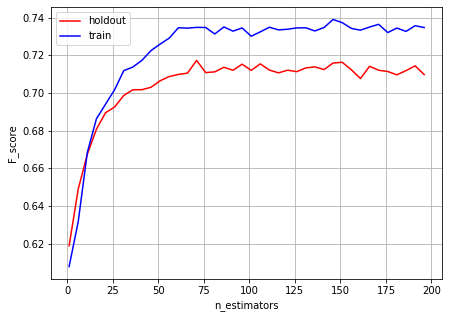

In [32]:
f=plt.figure(figsize=(7,5))
plt.plot(n_estimators_range, F_valid, "r", label = 'holdout')
plt.plot(n_estimators_range, F_train, "b", label = 'train')
plt.ylabel('F_score')
plt.xlabel('n_estimators')
plt.legend()
plt.grid();
print(f'best n_estimators: {n_estimators_range[F_valid.index(max(F_valid))]}')

In [33]:
#Обучим модель для последующих пунктов
cat = CatBoostClassifier(n_estimators = 71)
cat.fit(X_train, y_train);

Learning rate set to 0.434489
0:	learn: 0.5046830	total: 9.96ms	remaining: 697ms
1:	learn: 0.4253076	total: 15.2ms	remaining: 523ms
2:	learn: 0.3830141	total: 21.4ms	remaining: 485ms
3:	learn: 0.3574331	total: 27.1ms	remaining: 454ms
4:	learn: 0.3415066	total: 31.7ms	remaining: 419ms
5:	learn: 0.3276520	total: 35.7ms	remaining: 386ms
6:	learn: 0.3210671	total: 39.3ms	remaining: 360ms
7:	learn: 0.3159200	total: 43.7ms	remaining: 344ms
8:	learn: 0.3116251	total: 47.4ms	remaining: 326ms
9:	learn: 0.3077090	total: 50.9ms	remaining: 310ms
10:	learn: 0.3056840	total: 54.3ms	remaining: 296ms
11:	learn: 0.3033923	total: 58ms	remaining: 285ms
12:	learn: 0.3014951	total: 61.6ms	remaining: 275ms
13:	learn: 0.2991684	total: 65.3ms	remaining: 266ms
14:	learn: 0.2983941	total: 69ms	remaining: 257ms
15:	learn: 0.2972525	total: 72.7ms	remaining: 250ms
16:	learn: 0.2960462	total: 76.3ms	remaining: 242ms
17:	learn: 0.2951177	total: 80.3ms	remaining: 237ms
18:	learn: 0.2928012	total: 84.1ms	remaining: 23

In [34]:
cfm = confusion_matrix(y_holdout.to_numpy(), cat.predict(X_holdout)) 
pd.DataFrame(data  =  cfm,  columns  =  ['predicted_0', 'predicted_1'], index = ['actual_0', 'actual_1'])

,predicted_0,predicted_1
actual_0,7641,469
actual_1,900,1736


In [35]:
y_pred_valid = cat.predict(X_holdout)
recall_score(y_holdout, y_pred_valid), precision_score(y_holdout, y_pred_valid), f1_score(y_holdout, y_pred_valid)

(0.6585735963581184, 0.7873015873015873, 0.7172071885973973)

## Пункт 7

In [ ]:
X_train = X_train.to_numpy(dtype=('float32'))
X_holdout = X_holdout.to_numpy(dtype=('float32'))

In [39]:
y_train = np_utils.to_categorical(y_train, 2)
y_holdout = np_utils.to_categorical(y_holdout, 2)

In [40]:
NB_CLASSES = y_train.shape[1]
INPUT_SHAPE = (X_train.shape[1],)

In [41]:
model = Sequential()
model.add(Dense(32, input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                480       
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0

In [42]:
NN = Sequential([
    Dense(32, input_shape = INPUT_SHAPE, activation = 'relu'),
    Dropout(0.3),
    Dense(16, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(NB_CLASSES, activation = 'softmax'),
])
NN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                480       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 18        
Total params: 1,162
Trainable params: 1,162
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss='binary_crossentropy',
optimizer = 'adam',
metrics=['Precision', 'Recall'])

In [44]:
NN.compile(loss='binary_crossentropy',
optimizer = 'adam',
metrics=['Precision', 'Recall'])

In [45]:
history = model.fit(X_train, y_train,
                    batch_size = 32, epochs = 30,
                    verbose = 1, validation_data = (X_holdout, y_holdout))

Train on 21815 samples, validate on 10746 samples
Epoch 1/30
21815/21815 [==============================] - 2s 113us/sample - loss: 0.4332 - Precision: 0.7880 - Recall: 0.7880 - val_loss: 0.3695 - val_Precision: 0.8266 - val_Recall: 0.8266
Epoch 2/30
21815/21815 [==============================] - 1s 53us/sample - loss: 0.3659 - Precision: 0.8306 - Recall: 0.8306 - val_loss: 0.3411 - val_Precision: 0.8464 - val_Recall: 0.8464
Epoch 3/30
21815/21815 [==============================] - 1s 56us/sample - loss: 0.3519 - Precision: 0.8350 - Recall: 0.8350 - val_loss: 0.3351 - val_Precision: 0.8463 - val_Recall: 0.8463
Epoch 4/30
21815/21815 [==============================] - 1s 55us/sample - loss: 0.3422 - Precision: 0.8413 - Recall: 0.8413 - val_loss: 0.3315 - val_Precision: 0.8488 - val_Recall: 0.8488
Epoch 5/30
21815/21815 [==============================] - 1s 54us/sample - loss: 0.3384 - Precision: 0.8420 - Recall: 0.8420 - val_loss: 0.3295 - val_Precision: 0.8469 - val_Recall: 0.8469
Epoc

In [46]:
history2 = NN.fit(X_train, y_train,
                    batch_size = 32, epochs = 30,
                    verbose = 1, validation_data = (X_holdout, y_holdout))

Train on 21815 samples, validate on 10746 samples
Epoch 1/30
21815/21815 [==============================] - 2s 92us/sample - loss: 0.4450 - Precision: 0.7916 - Recall: 0.7916 - val_loss: 0.3651 - val_Precision: 0.8324 - val_Recall: 0.8324
Epoch 2/30
21815/21815 [==============================] - 1s 50us/sample - loss: 0.3699 - Precision: 0.8253 - Recall: 0.8253 - val_loss: 0.3464 - val_Precision: 0.8391 - val_Recall: 0.8391
Epoch 3/30
21815/21815 [==============================] - 1s 47us/sample - loss: 0.3513 - Precision: 0.8342 - Recall: 0.8342 - val_loss: 0.3368 - val_Precision: 0.8440 - val_Recall: 0.8440
Epoch 4/30
21815/21815 [==============================] - 1s 51us/sample - loss: 0.3454 - Precision: 0.8375 - Recall: 0.8375 - val_loss: 0.3331 - val_Precision: 0.8467 - val_Recall: 0.8467
Epoch 5/30
21815/21815 [==============================] - 1s 52us/sample - loss: 0.3394 - Precision: 0.8410 - Recall: 0.8410 - val_loss: 0.3317 - val_Precision: 0.8455 - val_Recall: 0.8455
Epoch

In [47]:
train_f1_NN = []
test_f1_NN = []

for epochs in range(30):
    train_f1_NN.append(2*history.history['Precision'][epochs] * 
                       history.history['Recall'][epochs] /
                       (history.history['Precision'][epochs] +
                        history.history['Recall'][epochs]))
    
    test_f1_NN.append(2*history.history['val_Precision'][epochs] *
                     history.history['val_Recall'][epochs] / 
                     (history.history['val_Precision'][epochs] + 
                      history.history['val_Recall'][epochs]))

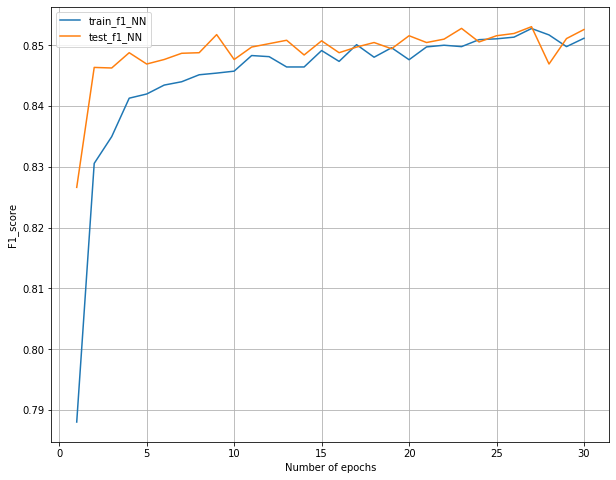

best n_epoch: 27


In [48]:
epoch_range = np.arange(1,31)
plt.figure(figsize=(10,8))
plt.plot(epoch_range, train_f1_NN)
plt.plot(epoch_range, test_f1_NN)
plt.xlabel('Number of epochs')
plt.ylabel('F1_score')
plt.grid()
plt.legend(['train_f1_NN', 'test_f1_NN'])
plt.show()
print(f'best n_epoch: {epoch_range[test_f1_NN.index(max(test_f1_NN))]}')

In [49]:
train_f1_NN = []
test_f1_NN = []

for epochs in range(30):
    train_f1_NN.append(2*history2.history['Precision'][epochs] * 
                       history2.history['Recall'][epochs] /
                       (history2.history['Precision'][epochs] +
                        history2.history['Recall'][epochs]))
    
    test_f1_NN.append(2*history2.history['val_Precision'][epochs] *
                     history2.history['val_Recall'][epochs] / 
                     (history2.history['val_Precision'][epochs] + 
                      history2.history['val_Recall'][epochs]))

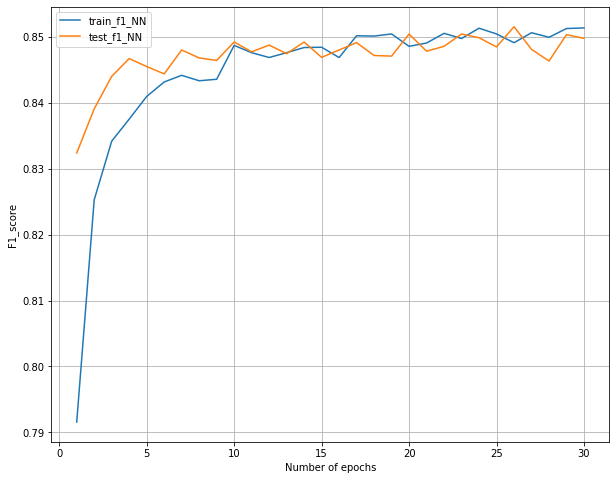

best n_epoch: 26


In [50]:
epoch_range = np.arange(1,31)
plt.figure(figsize=(10,8))
plt.plot(epoch_range, train_f1_NN)
plt.plot(epoch_range, test_f1_NN)
plt.xlabel('Number of epochs')
plt.ylabel('F1_score')
plt.grid()
plt.legend(['train_f1_NN', 'test_f1_NN'])
plt.show()
print(f'best n_epoch: {epoch_range[test_f1_NN.index(max(test_f1_NN))]}')
best_f = max(test_f1_NN)

In [51]:
history2 = NN.fit(X_train, y_train,
                    batch_size = 32, epochs = 26,
                    verbose = 1, validation_data = (X_holdout, y_holdout))

Train on 21815 samples, validate on 10746 samples
Epoch 1/26
21815/21815 [==============================] - 1s 44us/sample - loss: 0.3187 - Precision: 0.8511 - Recall: 0.8511 - val_loss: 0.3220 - val_Precision: 0.8479 - val_Recall: 0.8479
Epoch 2/26
21815/21815 [==============================] - 1s 46us/sample - loss: 0.3185 - Precision: 0.8520 - Recall: 0.8520 - val_loss: 0.3250 - val_Precision: 0.8490 - val_Recall: 0.8490
Epoch 3/26
21815/21815 [==============================] - 1s 56us/sample - loss: 0.3187 - Precision: 0.8505 - Recall: 0.8505 - val_loss: 0.3215 - val_Precision: 0.8479 - val_Recall: 0.8479
Epoch 4/26
21815/21815 [==============================] - 1s 48us/sample - loss: 0.3178 - Precision: 0.8513 - Recall: 0.8513 - val_loss: 0.3217 - val_Precision: 0.8488 - val_Recall: 0.8488
Epoch 5/26
21815/21815 [==============================] - 1s 45us/sample - loss: 0.3171 - Precision: 0.8498 - Recall: 0.8498 - val_loss: 0.3253 - val_Precision: 0.8468 - val_Recall: 0.8468
Epoch

In [52]:
y_pred = NN.predict_classes(X_holdout)

In [53]:
y_arr = []
for y in y_holdout:
    if y[0] == 1.0:
        y_arr.append(int(0))
    else:
        y_arr.append(int(1))

In [54]:
cfm = confusion_matrix(y_arr, y_pred) 
pd.DataFrame(data  =  cfm,  columns  =  ['predicted_0', 'predicted_1'], index = ['actual_0', 'actual_1'])

,predicted_0,predicted_1
actual_0,7643,467
actual_1,1166,1470


In [55]:
print(f'f1 score for NN: {best_f:1.3f}')

f1 score for NN: 0.852


## Пункт 8

In [56]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

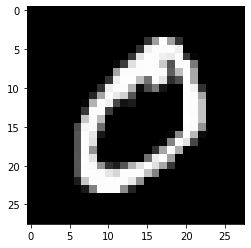

In [57]:
sample = 1
image = X_train[sample]
# plot the sample
fig = plt.figure()
plt.imshow(image, cmap='gray')
plt.show()

In [58]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_holdout = X_test.reshape(X_test.shape[0], 28*28)

In [59]:
X_train.shape, X_holdout.shape

((60000, 784), (10000, 784))

In [60]:
X_train, X_holdout = X_train/255.0, X_holdout/255.0

In [61]:
#Обучим модель для последующих пунктов
cat = CatBoostClassifier(n_estimators = 120)
cat.fit(X_train, y_train);

Learning rate set to 0.5
0:	learn: 1.3693570	total: 1.5s	remaining: 2m 58s
1:	learn: 1.0041482	total: 3.04s	remaining: 2m 59s
2:	learn: 0.7919847	total: 4.57s	remaining: 2m 58s
3:	learn: 0.6832921	total: 6.09s	remaining: 2m 56s
4:	learn: 0.5967622	total: 7.69s	remaining: 2m 56s
5:	learn: 0.5364910	total: 9.51s	remaining: 3m
6:	learn: 0.4757513	total: 11.7s	remaining: 3m 9s
7:	learn: 0.4431876	total: 13.8s	remaining: 3m 13s
8:	learn: 0.4002160	total: 16s	remaining: 3m 16s
9:	learn: 0.3750498	total: 18.1s	remaining: 3m 18s
10:	learn: 0.3547074	total: 20.1s	remaining: 3m 19s
11:	learn: 0.3350013	total: 22.1s	remaining: 3m 19s
12:	learn: 0.3207390	total: 24.2s	remaining: 3m 19s
13:	learn: 0.3029606	total: 26.3s	remaining: 3m 19s
14:	learn: 0.2869101	total: 28.4s	remaining: 3m 18s
15:	learn: 0.2747568	total: 30.7s	remaining: 3m 19s
16:	learn: 0.2609327	total: 33.3s	remaining: 3m 21s
17:	learn: 0.2451569	total: 35.8s	remaining: 3m 22s
18:	learn: 0.2384110	total: 37.9s	remaining: 3m 21s
19:	l

In [62]:
y_pred = cat.predict(X_holdout)

In [63]:
y_prediction = []
for i in y_pred:
    y_prediction.append(i[0])

In [64]:
y_test = np.array(y_test, dtype= 'int64')
y_prediction = np.array(y_prediction, dtype= 'int64')

In [65]:
f1_score(y_test, y_prediction, average='micro')

0.9541

In [66]:
cfm = confusion_matrix(y_test, y_prediction)
pd.DataFrame(data = cfm, columns=['0','1','2','3','4','5','6','7','8','9'],
                       index = ['0','1','2','3','4','5','6','7','8','9'])

,0,1,2,3,4,5,6,7,8,9
0,965,0,2,1,0,2,5,2,2,1
1,0,1119,3,3,1,3,1,0,4,1
2,0,3,983,9,5,0,6,13,12,1
3,3,0,9,949,1,23,0,7,10,8
4,1,2,4,3,938,0,5,0,3,26
5,8,1,1,16,2,839,9,1,11,4
6,10,4,3,0,10,14,912,0,5,0
7,1,5,18,6,3,1,0,976,1,17
8,8,2,5,9,4,7,6,5,920,8
9,6,4,2,12,22,3,1,12,7,940


In [67]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [68]:
INPUT_SHAPE = (X_train.shape[1],)
INPUT_SHAPE

(784,)

In [69]:
NN = Sequential([
    Dense(32, input_shape = INPUT_SHAPE, activation = 'relu'),
    Dropout(0.3),
    Dense(16, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(10, activation = 'softmax'),
])
NN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                25120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                90        
Total params: 25,874
Trainable params: 25,874
Non-trainable params: 0
_________________________________________________________________


In [70]:
NN.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics=['Precision', 'Recall'])

In [71]:
history = NN.fit(X_train, y_train, batch_size=128,
                       epochs=60, verbose=1,
                       validation_data=(X_holdout, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 2s 28us/sample - loss: 1.0535 - Precision: 0.8846 - Recall: 0.4791 - val_loss: 0.4036 - val_Precision: 0.9332 - val_Recall: 0.8538
Epoch 2/60
60000/60000 [==============================] - 1s 16us/sample - loss: 0.4773 - Precision: 0.9130 - Recall: 0.8110 - val_loss: 0.2863 - val_Precision: 0.9444 - val_Recall: 0.9018
Epoch 3/60
60000/60000 [==============================] - 1s 16us/sample - loss: 0.3999 - Precision: 0.9226 - Recall: 0.8472 - val_loss: 0.2552 - val_Precision: 0.9517 - val_Recall: 0.9144
Epoch 4/60
60000/60000 [==============================] - 1s 14us/sample - loss: 0.3570 - Precision: 0.9291 - Recall: 0.8667 - val_loss: 0.2226 - val_Precision: 0.9549 - val_Recall: 0.9239
Epoch 5/60
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3306 - Precision: 0.9334 - Recall: 0.8767 - val_loss: 0.2043 - val_Precision: 0.9594 - val_Recall: 0.9284
Epoch

In [72]:
train_f1_NN = []
test_f1_NN = []

for epochs in range(60):
    train_f1_NN.append(2*history.history['Precision'][epochs] * 
                       history.history['Recall'][epochs] /
                       (history.history['Precision'][epochs] +
                        history.history['Recall'][epochs]))
    
    test_f1_NN.append(2*history.history['val_Precision'][epochs] *
                     history.history['val_Recall'][epochs] / 
                     (history.history['val_Precision'][epochs] + 
                      history.history['val_Recall'][epochs]))

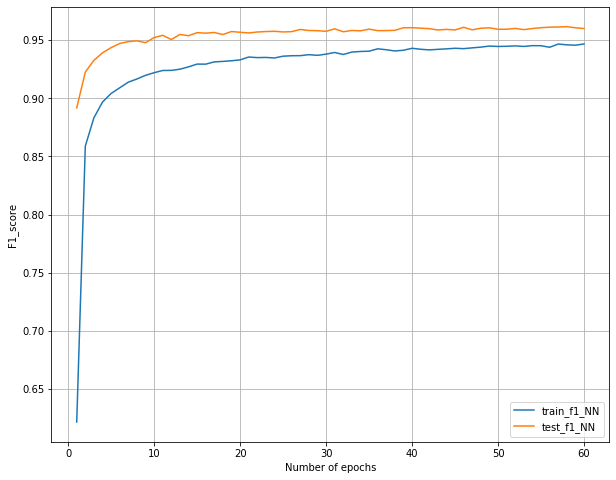

best n_epoch: 58


In [73]:
epoch_range = np.arange(1,61)
plt.figure(figsize=(10,8))
plt.plot(epoch_range, train_f1_NN)
plt.plot(epoch_range, test_f1_NN)
plt.xlabel('Number of epochs')
plt.ylabel('F1_score')
plt.grid()
plt.legend(['train_f1_NN', 'test_f1_NN'])
plt.show()
print(f'best n_epoch: {epoch_range[test_f1_NN.index(max(test_f1_NN))]}')
best_f = max(test_f1_NN)

In [74]:
print(f'f1 score for NN: {best_f:1.3f}')

f1 score for NN: 0.962


 - F1 for CatBoost: 0.954
 - F1 for NN      : 0.950
 
Вывод: модель нейронной сети оказалась хуже по качеству, чем градиентный бустинг, следовательно нейронные сети не панацея для всех видов задач.